In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

加载数据

In [51]:
data = pd.read_csv('data/Groceries_dataset.csv')
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


从数据集的前 5 行可以看出，我们有 3 个不同的列： 成员编号是每个客户唯一的编号。Date 表示交易日期，最后 itemDescription 表示在此日期购买的相应产品。

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


为了检查列的数据类型，我使用了 info() 函数。根据下面的结果，Member_number 和 Date 列的数据类型不正确。
在接下来的步骤中，我将把它们改为正确的形式。

In [53]:
# 检查缺失值
nan_values = data.isna().sum()
nan_values

Member_number      0
Date               0
itemDescription    0
dtype: int64

根据上述结果，所有列都没有缺失值。

In [54]:
# 将日期列转换为正确的数据类型（datetime
data.Date = pd.to_datetime(data.Date)
data.Member_number = data['Member_number'].astype('str')
data.info()  # 现在它们的数据类型正确了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


C:\Users\developer_zxh\AppData\Local\Temp\ipykernel_21860\4049858898.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data.Date = pd.to_datetime(data.Date)


In [55]:
data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


## 十大畅销商品

In [56]:
show_data = (data.groupby(by="itemDescription").size()
             .reset_index(name='Count')
             .sort_values(by='Count', ascending=False)
             .head(10))
show_data

,itemDescription,Count
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


<Axes: xlabel='itemDescription', ylabel='Count'>

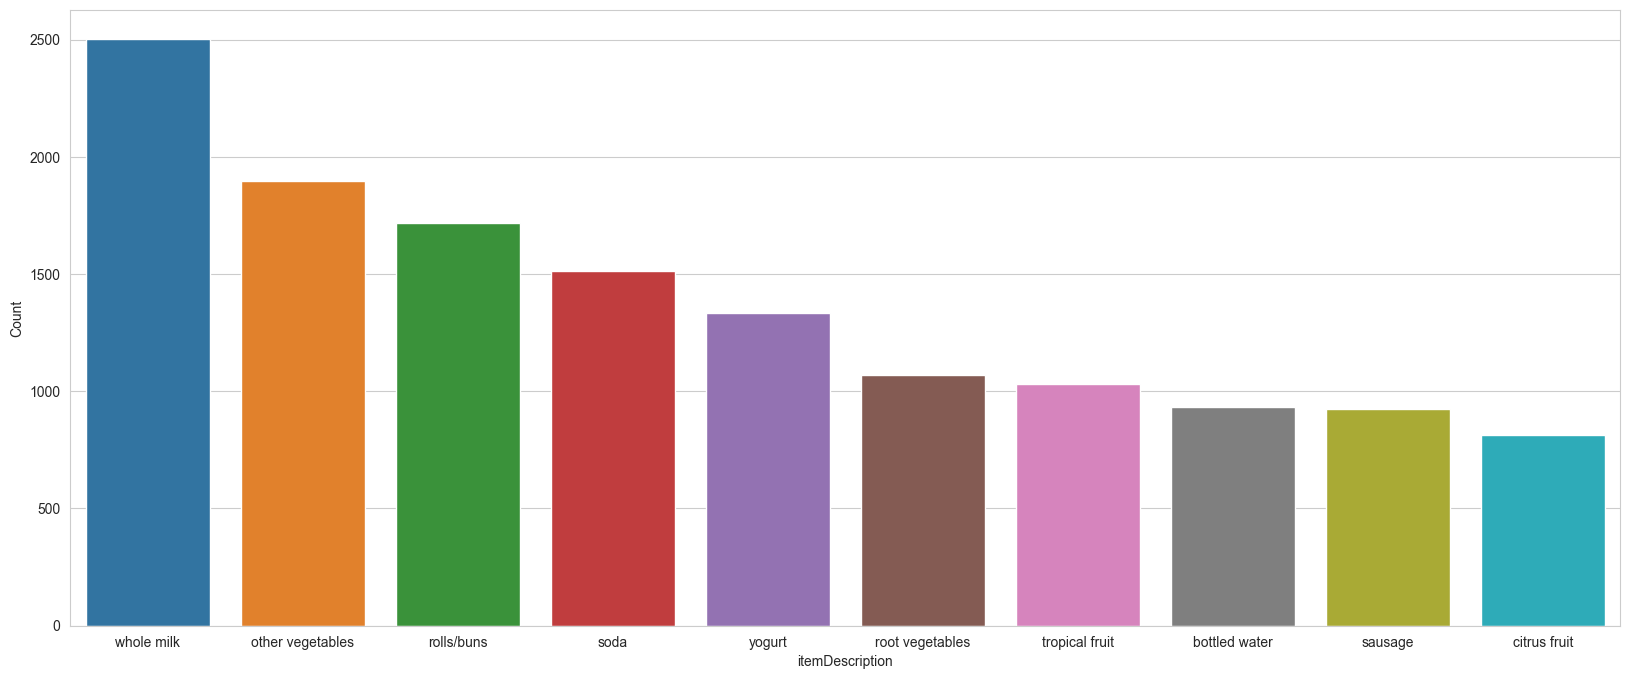

In [57]:
plt.figure(figsize=(20, 8))
sns.barplot(x="itemDescription", y="Count", data=show_data)

## 月-年销售额

In [58]:
show_data = data.copy()
show_data['year-month'] = show_data['Date'].dt.strftime('%Y-%m')
show_data = show_data.groupby('year-month').size().reset_index(name='Count')
show_data

,year-month,Count
0,2014-01,1527
1,2014-02,1437
2,2014-03,1411
3,2014-04,1561
4,2014-05,1615
5,2014-06,1570
6,2014-07,1576
7,2014-08,1575
8,2014-09,1472
9,2014-10,1591


<Axes: xlabel='year-month', ylabel='Count'>

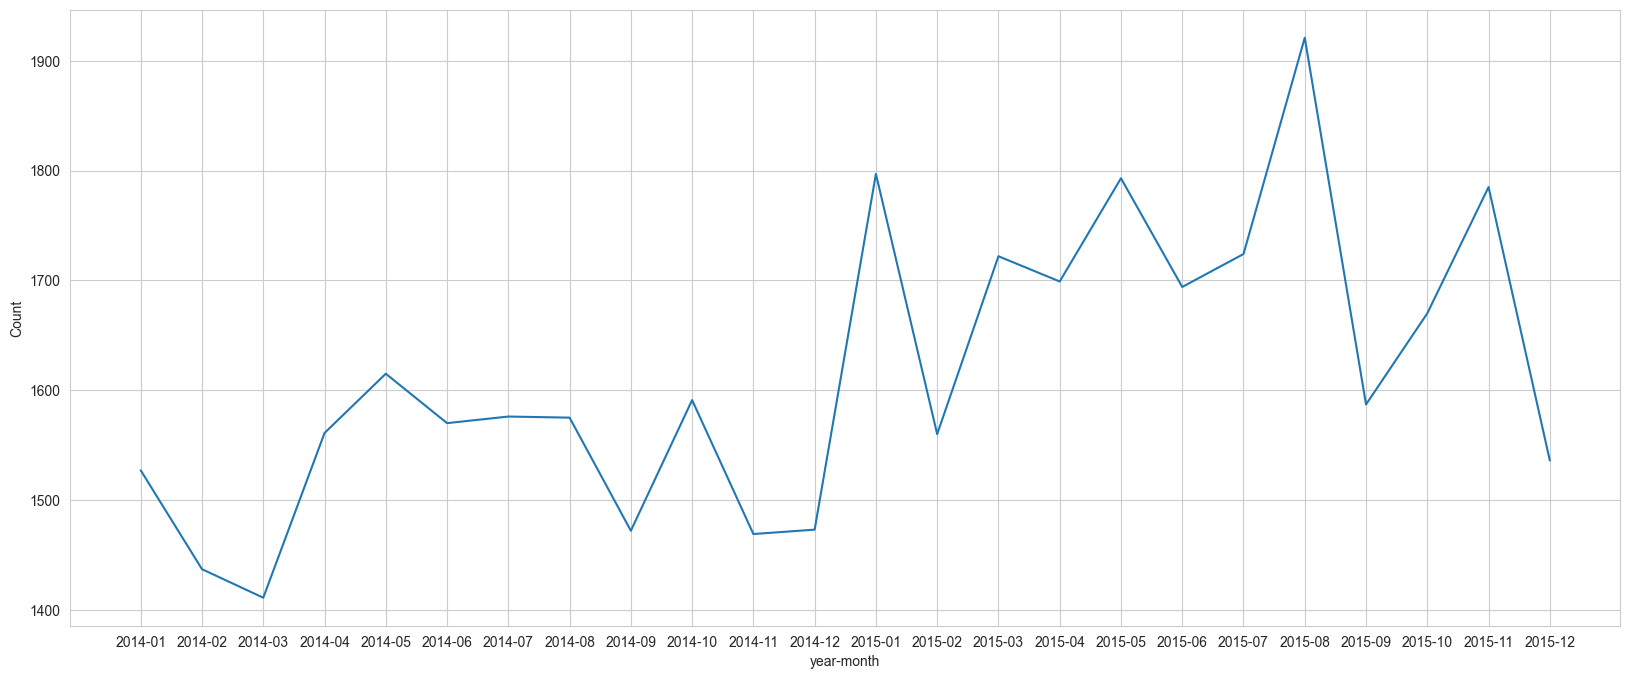

In [59]:
plt.figure(figsize=(20, 8))
sns.lineplot(x="year-month", y="Count", data=show_data)

# 创建购物篮

In [60]:
# baskets = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
baskets = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count()
baskets

Member_number  itemDescription    
1000           canned beer            1
               hygiene articles       1
               misc. beverages        1
               pastry                 1
               pickled vegetables     1
                                     ..
5000           onions                 1
               other vegetables       1
               root vegetables        1
               semi-finished bread    1
               soda                   1
Name: itemDescription, Length: 34766, dtype: int64

In [61]:
baskets = baskets.unstack(1)
baskets

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
baskets = baskets.fillna(0).reset_index()
baskets

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3895,4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


根据上面的查询，我们创建了客户-物品矩阵。每一行代表每个客户的交易，每一列代表购买的物品。矩阵对应的数字代表该用户购买该物品的次数。

In [63]:
# 让我们检查一下全脂牛奶这个销售量最大的项目，其销售量是否与我们在柱状图中讨论的相同。
baskets['whole milk'].sum()

# 是的，它满足我们的结果。

2502.0

In [64]:
# 对销量超过 1 的商品进行编码
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

In [65]:
baskets_final = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)
baskets_final.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 客户-项目矩阵的最终形式。

In [66]:
# 找出最常一起出售的商品
frequent_itemsets = apriori(baskets_final, min_support=0.038, use_colnames=True, max_len=4).sort_values(by='support')
frequent_itemsets

D:\developing\anaconda3\envs\study_hei\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
247,0.038225,"(tropical fruit, other vegetables, rolls/buns)"
235,0.038225,"(whole milk, bottled beer, rolls/buns)"
113,0.038481,"(chocolate, other vegetables)"
69,0.038481,"(yogurt, beef)"
44,0.038481,(processed cheese)
...,...,...
62,0.282966,(yogurt)
52,0.313494,(soda)
46,0.349666,(rolls/buns)
40,0.376603,(other vegetables)


从上面的结果可以看出，一起出现最多的商品是黄油和购物袋，以及涂抹奶酪等。

In [67]:
# 创建关联规则，指明前因后果项目
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(10)

,antecedents,consequents,support,confidence,lift
222,"(whole milk, sausage)",(yogurt),0.044895,0.419664,1.483093
227,(yogurt),"(whole milk, sausage)",0.044895,0.158658,1.483093
226,(sausage),"(whole milk, yogurt)",0.044895,0.217933,1.447192
223,"(whole milk, yogurt)",(sausage),0.044895,0.298126,1.447192
139,(sausage),"(other vegetables, rolls/buns)",0.041816,0.202989,1.383305
138,"(other vegetables, rolls/buns)",(sausage),0.041816,0.284965,1.383305
123,"(whole milk, rolls/buns)",(shopping bags),0.041303,0.231322,1.374531
126,(shopping bags),"(whole milk, rolls/buns)",0.041303,0.245427,1.374531
382,(bottled water),"(whole milk, other vegetables)",0.056183,0.262905,1.373732
379,"(whole milk, other vegetables)",(bottled water),0.056183,0.293566,1.373732


从上面的结果可以看出

香肠 --> 酸奶、面包卷/面包圈

根菜、全脂牛奶 --> 购物袋

面包卷/面包、苏打水 --> 香肠

黄油、全脂牛奶 --> 酸奶、

等有很强的关系。

## 网图提现关联关系

In [68]:
from pyecharts import options as opts
from pyecharts.charts import Graph

In [69]:
rules.shape[0]

564

In [70]:
nodes_data = set()

links = []
def map(data, MIN, MAX):
    """
    归一化映射到任意区间
    :param data: 数据
    :param MIN: 目标数据最小值
    :param MAX: 目标数据最小值
    :return:
    """
    d_min = data.min()  # 当前数据最大值
    d_max = data.max()  # 当前数据最小值
    return MIN + (MAX - MIN) / (d_max - d_min) * (data - d_min)


maplift = map(rules.lift, 0, 5)

for i in range(rules.shape[0]):
    item = rules.iloc[i]
    for antecedent in item.antecedents:
        for consequent in item.consequents:
            nodes_data.add(antecedent)
            nodes_data.add(consequent)
            links.append({
                "id": "",
                "source": antecedent,
                "target": consequent,
                "lineStyle": opts.LineStyleOpts(width=maplift.iloc[i], color="source", curve=0.3),
            })

nodes = [{"name": x, "symbolSize": 5} for x in nodes_data]

In [71]:


categories = [{
    "name": "购物篮关系"
}, ]
c = (
    Graph(init_opts=opts.InitOpts(width="1000px", height="1000px"))
    .add(
        "",
        nodes=nodes,
        links=links,
        categories=categories,
        layout="circular",
        is_rotate_label=True,
        itemstyle_opts=opts.ItemStyleOpts(color='#4B008299'),
        linestyle_opts=opts.LineStyleOpts(color="source", curve=0.3),
        label_opts=opts.LabelOpts(position="right"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Graph-Les Miserables"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_left="2%", pos_top="20%"),
    )
    .render("graph_les_miserables.html")
)
